In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [37]:
G = 6.67428e-11

AU = (149.6e6 * 1000)
SCALE = 250/AU

class Body():
    ## All vectors are decomposed in x-axis and y-axis
    ## p = (x,y) -> Position Vector
    ## v = (x,y) -> Velocity Vector
    
    name = 'UNNAMED'
    mass = 0
    v_x = v_y = 0
    p_x = p_y = 0
    
    def acceleration(self, other):
        
        if self is other:
            raise ValueError("Attraction of object %r to itself requested"
                             % self.name)
        
        d_x = (other.p_x - self.p_x)
        d_y = (other.p_y - self.p_y)
        d = math.sqrt(d_x**2 + d_y**2) ## Calculate the distance between the bodies
        if d == 0:
            raise ValueError('The bodies %r and %r collided' %(self.name, other.name))
            
        ## Compute acceleration OTHER causes on THIS
        acc = G * other.mass / d**2
        
        ## Decomposing the acceleration on x-axis and y-axis
        theta = math.atan2(d_y, d_x)
        a_x = acc*math.cos(theta)
        a_y = acc*math.sin(theta)
        return a_x, a_y
    
def simulate(bodies):
    step = 24*3600 # Total of seconds for each step: 24*3600 = one day
    count = 0
    pos = {}
    for body in bodies:
        pos[body.name] = []
        
    while count < 365:
        acc = {}
        for body in bodies:
            acc_x = acc_y = 0
            for other in bodies:
                if body is other:
                    continue
                a_x, a_y = body.acceleration(other)
                acc_x += a_x
                acc_y += a_y
            acc[body] = (acc_x, acc_y)

        for body in bodies:
            a_x, a_y = acc[body]

            body.v_x += a_x * step
            body.v_y += a_y * step

            body.p_x += body.v_x * step
            body.p_y += body.v_y * step
            
            pos[body.name].append((body.p_x,body.p_y))
        count += 1
    return pos

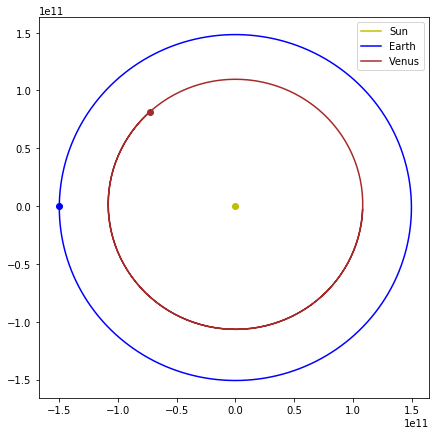

In [82]:
def main():
    sun = Body()
    sun.name = 'Sun'
    sun.mass = 1.98892 * 10**30

    earth = Body()
    earth.name = 'Earth'
    earth.mass = 5.9742 * 10**24
    earth.p_x = -1*AU
    earth.v_y = 29.783 * 1000            # 29.783 km/sec

    # Venus parameters taken from
    # http://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
    venus = Body()
    venus.name = 'Venus'
    venus.mass = 4.8685 * 10**24
    venus.p_x = 0.723 * AU
    venus.v_y = -35.02 * 1000
    
    pos = simulate([sun, earth, venus])

#     print(pos['Sun'])
    
    sun_x = [i[0] for i in pos['Sun']]
    sun_y = [i[1] for i in pos['Sun']]
    
    earth_x = [i[0] for i in pos['Earth']]
    earth_y = [i[1] for i in pos['Earth']]
    
    ven_x = [i[0] for i in pos['Venus']]
    ven_y = [i[1] for i in pos['Venus']]
    
    plt.figure(figsize=(7,7))

    plt.plot(sun_x, sun_y, label='Sun', color='y')
    plt.plot(earth_x, earth_y, label='Earth', color='b')
    plt.plot(ven_x, ven_y, label='Venus', color='brown')
    
    plt.scatter(earth_x[-1],earth_y[-1], color = 'b')
    plt.scatter(ven_x[-1],ven_y[-1], color = 'brown')
    plt.scatter(0,0, color = 'y')
    plt.legend()
if __name__ == '__main__':
    main()    

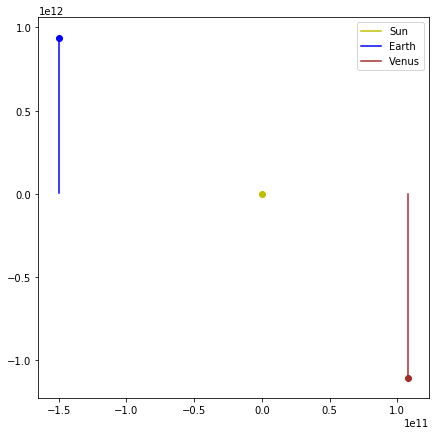

In [83]:
def main():
    sun = Body()
    sun.name = 'Sun'
    sun.mass = 1 * 10**25

    earth = Body()
    earth.name = 'Earth'
    earth.mass = 1 * 10**25
    earth.p_x = -1*AU
    earth.v_y = 29.783 * 1000            # 29.783 km/sec

    # Venus parameters taken from
    # http://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
    venus = Body()
    venus.name = 'Venus'
    venus.mass = 1 * 10**25
    venus.p_x = 0.723 * AU
    venus.v_y = -35.02 * 1000
    
    pos = simulate([sun, earth, venus])

#     print(pos['Sun'])
    
    sun_x = [i[0] for i in pos['Sun']]
    sun_y = [i[1] for i in pos['Sun']]
    
    earth_x = [i[0] for i in pos['Earth']]
    earth_y = [i[1] for i in pos['Earth']]
    
    ven_x = [i[0] for i in pos['Venus']]
    ven_y = [i[1] for i in pos['Venus']]
    
    plt.figure(figsize=(7,7))

    plt.plot(sun_x, sun_y, label='Sun', color='y')
    plt.plot(earth_x, earth_y, label='Earth', color='b')
    plt.plot(ven_x, ven_y, label='Venus', color='brown')
    
    plt.scatter(earth_x[-1],earth_y[-1], color = 'b')
    plt.scatter(ven_x[-1],ven_y[-1], color = 'brown')
    plt.scatter(0,0, color = 'y')
    plt.legend()
if __name__ == '__main__':
    main()    

In [85]:
149600000

149600000

In [86]:
1.49e11

149000000000.0